1. In class we wrote code to get all of the links from the G77 statements website: https://www.g77.org/statement/index.php
Please write code that iterates through each of the links and formats them properly so that they are a readable url. Print them to the console.



In [135]:
#Your code here:
import requests
from bs4 import BeautifulSoup


#url of what we want to scrap (to make it easier)
url = "https://www.g77.org/statement/index.php"

#send a request to the url
response = requests.get(url)

if response.status_code == 200:
    
    #when you get the response, look at the html version??
    soup = BeautifulSoup(response.content, 'html.parser')

    #get all the links tags
    links= soup.find_all('a')

    new_links = []
    for link in links:
        href = link.get("href")
        if "/statement/getstatement" in href:
            url = "https://www.g77.org"
            new_links.append(url + href)
        elif href != "javascript:;": # ignore the javascript tag"
            new_links.append(url + href)
else:
    print("Retrival not successful")

    

for new_link in new_links:
    print(new_link)


https://www.g77.org/statement/index.php#jan
https://www.g77.org/statement/index.php#jul
https://www.g77.org/statement/index.php#feb
https://www.g77.org/statement/index.php#aug
https://www.g77.org/statement/index.php#mar
https://www.g77.org/statement/index.php#sep
https://www.g77.org/statement/index.php#apr
https://www.g77.org/statement/index.php#oct
https://www.g77.org/statement/index.php#may
https://www.g77.org/statement/index.php#nov
https://www.g77.org/statement/index.php#jun
https://www.g77.org/statement/index.php#dec
https://www.g77.org/statement/getstatement.php?id=240215
https://www.g77.org/statement/getstatement.php?id=240208
https://www.g77.org/statement/getstatement.php?id=240207b
https://www.g77.org/statement/getstatement.php?id=240207
https://www.g77.org/statement/getstatement.php?id=240206b
https://www.g77.org/statement/getstatement.php?id=240206
https://www.g77.org/statement/getstatement.php?id=240205c
https://www.g77.org/statement/getstatement.php?id=240205b
https://www.

2. Now modify your code so that the urls are saved as a list. Iterate through the list, open each url, and extract the text from each, and save the text to a file called G77_2024.

In [136]:
#Your code here:
#links are already saved in new_links

# Specify the file path and name
group_77_txt = "file_path.txt"

for link in new_links:
    if ".org#" not in link:
        url = link
        
        response = requests.get(url)
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        paragraphs = soup.find_all("p")
        
        statements = '\n'.join([paragraph.text for paragraph in paragraphs])

3. Perform a word frequency distribution on the text and visualize the top 20 words used in these statements.( Please remove any stopwords first)

In [137]:
#Your code here:

4. Here is a link to a speech made by President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trumps speech only, remove stopwords and perform a word frequency distribution and visualize it. 

In [160]:
#Your code here:
import re # to remove special characters in bracket
url = " https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

paragraphs = soup.find_all('p')

npr_text = "\n".join([paragraph.text for paragraph in paragraphs])

#print(npr_text)

# Find the index where trump started his speech
start_index = npr_text.find("Well, thank you very much. This is incredible.")

#start the speech from there...
speech_text = npr_text[start_index:]

#since the audience response are in brackets...
#remove everything in brackets and replace it with nothing
speech_text = re.sub("\(.*?\)","",speech_text)

#print(speech_text)

In [161]:
import nltk
from nltk.tokenize import word_tokenize #tokenize
from nltk import FreqDist #frequencyy distribution

tokens = word_tokenize(speech_text)

fdist_impeach = FreqDist(tokens)

print(fdist_impeach.most_common(20))


[('.', 968), (',', 719), ('the', 384), ('to', 335), ('of', 265), ('I', 219), ('and', 218), ('a', 212), ('you', 197), ('that', 178), ('it', 170), ("'s", 169), ('they', 160), ('in', 156), ('we', 153), ("n't", 131), ('do', 122), ('And', 115), ('have', 108), ("'re", 98)]


[('i', 219), ('people', 84), ('going', 73), ('want', 67), ('know', 58), ('get', 51), ('election', 44), ('country', 43), ('ballots', 43), ('got', 42), ('votes', 41), ('go', 40), ('one', 40), ('let', 39), ('back', 39), ('said', 37), ('state', 36), ('right', 33), ('think', 33), ('like', 32), ('way', 32), ('say', 31), ('never', 30), ('vote', 30), ('great', 25), ('even', 24), ('see', 24), ('states', 24), ('thousands', 23), ('president', 23), ('would', 22), ('years', 22), ('take', 21), ('four', 21), ('lot', 21), ('thank', 20), ('could', 20), ('good', 20), ('georgia', 20), ('much', 19), ('us', 18), ('pennsylvania', 18), ('well', 17), ('give', 17), ('happen', 17), ('cast', 17), ('media', 16), ('many', 16), ('big', 15), ('believe', 15), ('look', 15), ('ever', 15), ('ca', 15), ('things', 15), ('republicans', 15), ('biden', 15), ('democrats', 14), ('love', 14), ('come', 14), ('rid', 14), ('fight', 14), ('illegal', 14), ('county', 14), ('really', 13), ('bad', 13), ('nobody', 13), ('hell', 13), ('s

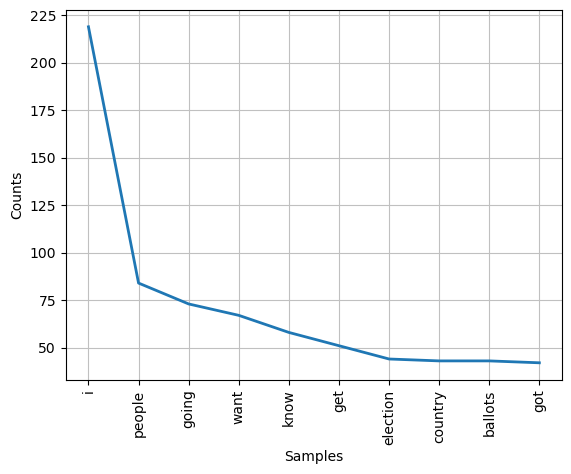

<Axes: xlabel='Samples', ylabel='Counts'>

In [162]:
#remove stopwords
from nltk.corpus import stopwords

stopwords1 = nltk.corpus.stopwords.words('english')

# special characters
special_character = r'\W+'

#keeping stopwords all the stop words, except for i
stopwords = [words for words in stopwords1 if words != 'i']

#remove stop word nt
stopwords.extend(["nt"])

#remove special characters in tokens and replace them with empty strings
tokens1 = [re.sub(special_character, '', word) for word in tokens]
 
#new tokens without the stopwords
new_tokens = []

for words in tokens1:
    #make each token of the lower format
    words = words.lower()
    # look at only words that aren't stop words (except for i)
    if words not in stopwords:
        # remove the empty string
        if words != '':
            new_tokens.append(words)
        
freq_dist1 = FreqDist(new_tokens)
print(freq_dist1.most_common(100))

freq_dist1.plot(10)

5. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt

What are the 10 most common things Donald Trump "loves?"



In [163]:
#Your code here:
import requests
# Define the URL of the raw text file on GitHub
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"

# Send a GET request to the URL to fetch the content
response = requests.get(url)

# Decode the content of the response from bytes to UTF-8 encoded text
trump_text = response.content.decode("utf-8")



In [164]:
from nltk.tokenize import word_tokenize #tokenize
from nltk import FreqDist #frequencyy distribution

 #make each word a token
tokens = word_tokenize(trump_text)

#how many times did each token a
freq_dist = FreqDist(tokens)

#find the most common word.. there are stopwords (except I...)
print(freq_dist.most_common(20))

[('.', 15093), (',', 8595), ('’', 8443), ('I', 6239), ('the', 5185), ('to', 5171), ('and', 3528), ('a', 3349), ('of', 2803), ('it', 2739), ('s', 2637), ('you', 2503), ('that', 2440), ('we', 2158), ('have', 2118), ('they', 1961), ('re', 1928), ('going', 1922), ('in', 1880), ('t', 1879)]


In [165]:
#remove stop words (except for I)
import re # to remove special characters
import nltk
from nltk.corpus import stopwords

stopwords1 = nltk.corpus.stopwords.words('english')

# special characters
special_character = r'\W+'

#keeping stopwords all the stop words, except for i
stopwords = [words for words in stopwords1 if words != 'i']

#remove special characters in tokens and replace them with empty strings
tokens1 = [re.sub(special_character, '', word) for word in tokens]
 
#new tokens without the stopwords
new_tokens = []

for words in tokens1:
    #make each token of the lower format
    words = words.lower()
    # look at only words that aren't stop words (except for i)
    if words not in stopwords:
        # remove the empty string
        if words != '':
            new_tokens.append(words)
        
freq_dist1 = FreqDist(new_tokens)
print(freq_dist1.most_common(100))

#freq_dist1.plot(10)
#print(stopwords)

[('i', 6248), ('going', 2055), ('people', 1337), ('know', 1315), ('said', 774), ('want', 760), ('great', 687), ('get', 633), ('like', 628), ('think', 626), ('one', 592), ('country', 535), ('say', 510), ('right', 501), ('look', 401), ('go', 392), ('money', 390), ('lot', 377), ('got', 371), ('many', 366), ('good', 355), ('make', 348), ('us', 342), ('really', 338), ('back', 338), ('way', 329), ('would', 328), ('mean', 327), ('much', 322), ('even', 314), ('take', 310), ('see', 290), ('never', 288), ('tell', 287), ('time', 280), ('trump', 279), ('win', 279), ('well', 276), ('love', 275), ('big', 259), ('things', 244), ('thing', 241), ('come', 237), ('everybody', 232), ('believe', 231), ('thank', 228), ('world', 224), ('ever', 215), ('let', 214), ('deal', 213), ('years', 209), ('nt', 208), ('president', 204), ('trade', 203), ('china', 201), ('okay', 197), ('america', 192), ('something', 191), ('jobs', 190), ('guy', 188), ('happen', 188), ('million', 188), ('need', 186), ('could', 184), ('wal

Based on the 100 most common words, Trump loves:
   - Himself
   - People
   - Wanting
   - Greatness
   - Money
   - Trump
   - Big things
   - America
   - Wall
   - The world
  

6. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?

In [173]:
#Your code here:
#!pip install pycountry
import pycountry # package with countries

# Get a list of all countries
all_countries = list(pycountry.countries)

#get country name
countries = [country.name for country in all_countries]

top_5 = []
for words, frequency in freq_dist1.most_common(500):
    wo = words.capitalize() #to make it upper case
    #print(wo)
    if wo in countries:
        top_5.append(wo)
        
print(top_5)

['China', 'Mexico', 'Israel', 'Iraq', 'Japan']


In class we talked about sentence tokenizers that could be useful in determining when sentences might be repeated. One application we discussed was in political speeches, when certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses:
"Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association.
These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."


7. Perform a frequency analysis that provides evidence for the assertion made in the Vox article. 

Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!


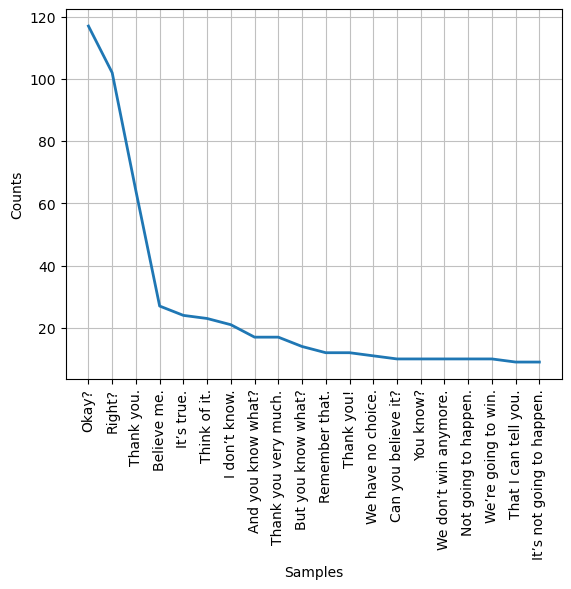

<Axes: xlabel='Samples', ylabel='Counts'>

In [179]:
#Your code here:

#USING SENTENCES
from nltk import sent_tokenize #sentence tokenize
from nltk.probability import FreqDist #frequency for sentences

sentences = sent_tokenize(trump_text) #make each sentence a token
fdist_sentences = FreqDist(sentences) 

#key value pear
#for sentence, frequency in fdist_sentences.items():
#    print(f"{sentence}:{frequency}")

fdist_sentences.plot(20)

In [187]:
#USING four grams:
from nltk import word_tokenize 
from nltk import FreqDist
from nltk.util import ngrams #to get any number of tokens

words = word_tokenize(trump_text) #make each sentence a token
#fdist_sentences = FreqDist(sentences) 
# Generate fourgrams
sixgrams = list(ngrams(words, 6))

fdist_fourgrams = FreqDist(sixgrams) 

fdist_fourgrams.most_common(10)

[(('.', 'We', '’', 're', 'going', 'to'), 257),
 ((',', 'we', '’', 're', 'going', 'to'), 60),
 (('and', 'we', '’', 're', 'going', 'to'), 56),
 (('.', 'I', 'don', '’', 't', 'know'), 53),
 (('I', 'don', '’', 't', 'want', 'to'), 46),
 (('.', 'I', 'don', '’', 't', 'want'), 44),
 (('.', 'It', '’', 's', 'going', 'to'), 39),
 (('we', '’', 're', 'going', 'to', 'do'), 38),
 (('it', '’', 's', 'going', 'to', 'be'), 38),
 (('And', 'we', '’', 're', 'going', 'to'), 37)]

*Remarks*: As we can see in our sentences approach, Trump says "Believe me" and "It's True" providing evidence for the claim that he is trying to convince his audience that he knows more than he is letting on. In the ngram approach. The most common six "words" Trump used was some variation of "We are going to.." While this phrasing is used by politians a lot, it still provides evidence supporting the Scientists claims. In general, saying "we are" makes the audience feel like they are not alone.

8.Sentiment Analysis
Sentiment analysis, also known as opinion mining or emotion AI, is a field of natural language processing (NLP) that focuses on identifying and categorizing opinions or sentiments expressed within text data. The primary goal is to determine the writer's or speaker's attitude towards a particular topic, product, service, or overall context. This attitude can range from positive, negative, to neutral, and may also encompass more nuanced emotions like happiness, anger, sadness, quantitative or emotional.


The most basic form of sentiment analysis assigns values to words based on a dictionary of words, from neutral to slightly positive or negative, moderately positive or negative, and extremely positive or negative. Vader is a popular package that analyzes sentiment.

In [325]:
#run this
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


This will compute a compound score by summing the valence scores of each word int he lexicon and then bnormalized between -1 (most negative) and +1 most positive. This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a "normalize, weighted composite score" is accurate.

let's test opur first sentiment using VADER. VADER is great on social media data which can be messy and contain emojis.
We will use the polarity_scores( ) method to obtain the polarity indices.

In [20]:
sentence = "I love that movie!"
score = analyzer.polarity_scores(sentence)
print(score)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}


In [21]:
sentence2 = "OMG, this job totally SUX!!"
score = analyzer.polarity_scores(sentence2)
print(score)

{'neg': 0.507, 'neu': 0.493, 'pos': 0.0, 'compound': -0.6261}


In [23]:
sentence3 = '😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence3)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}


In [24]:
sentence4 = '😀 😀 😀 😀 😀' #command+control+space brings up emoji'
score = analyzer.polarity_scores(sentence4)
print(score)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.8885}


The global financial crisis (GFC) refers to the period of extreme stress in global financial markets and banking systems between mid 2007 and early 2009. During the GFC, a downturn in the US housing market was a catalyst for a financial crisis that spread from the United States to the rest of the world through linkages in the global financial system. Many banks around the world incurred large losses and relied on government support to avoid bankruptcy. Millions of people lost their jobs as the major advanced economies experienced their deepest recessions since the Great Depression in the 1930s.

The Federal Reserve conference calls are a good way to track the sentiment that the Fed had toward the crisis. Did they know how bad it was? Did they think they could fix it? Starting in January of 2008, ending in October of 2008 map the sentiment of the Fed reserve calls.

Here are your documents:
Jan 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf
Mar 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf
July 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf
Sept 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf
Oct 2008: https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf


You will need to convert these pdf into text to process. 
1. Perform a word frequency analysis of each of the calls. Don't forget to remove stopwords.
2. Find and present any evidence that the Fed understands that what the US and world is going through is unlike anything that has ever before been experienced. What are the key phrases that convey this idea? How do you find them? Can you use a vector based approach or would you use a custom dictionary?
3. Extract any evidence that they thought that the situation could be quickly remedied and would not get as bad as it ended up gettting.
4. Parse the key participants and plot their sentiment over time. Who is the most positive? Who is the most negative? Who changes the most?
5. Add key makers to your visualization that bring in the key events of 2008.


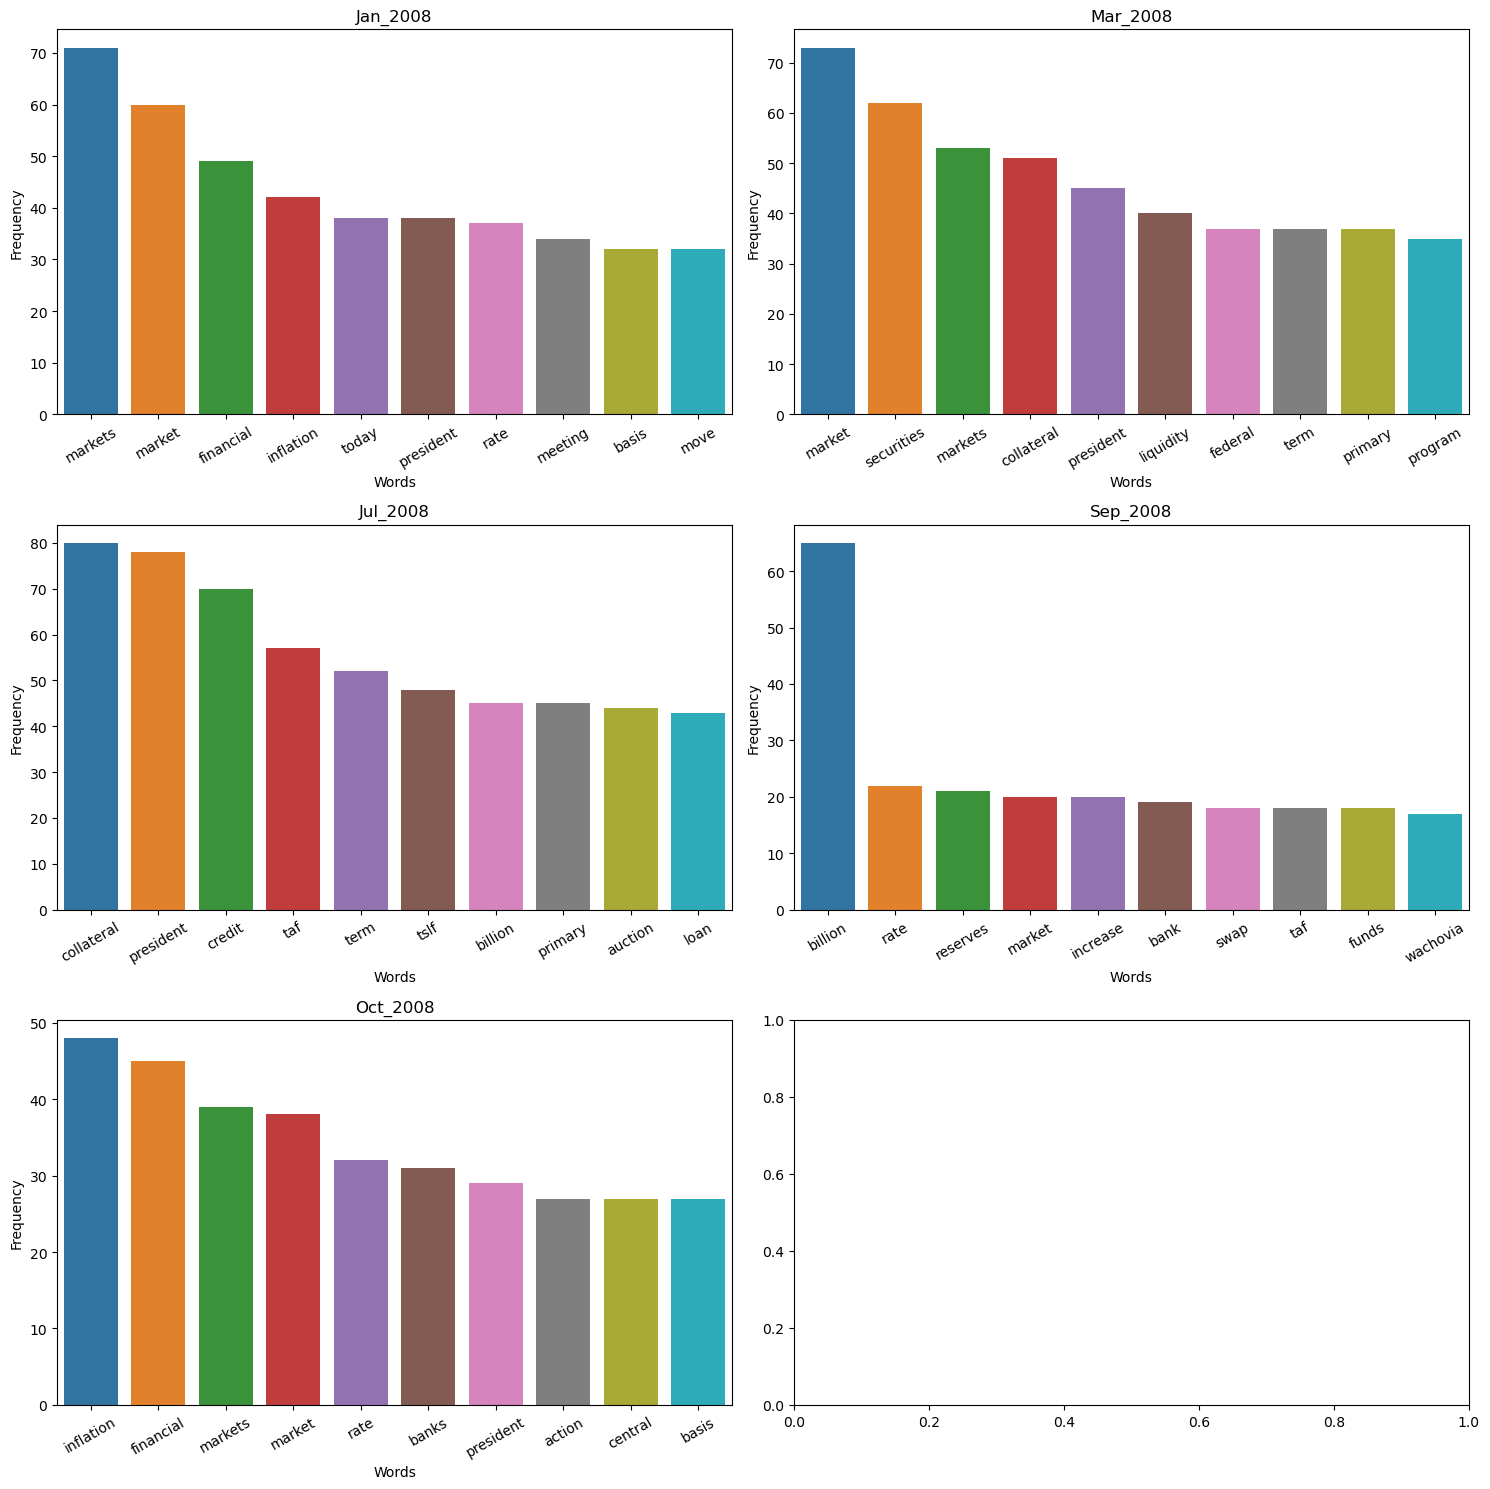

In [314]:
# NUMBER 1.
import pdfplumber
import re  # to remove page number and special characters
import nltk
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize  # tokenize
from nltk import FreqDist  # frequency distribution


dict_urls = {
    "Jan_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080121confcall.pdf",
    "Mar_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080310confcall.pdf",
    "Jul_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080724confcall.pdf",
    "Sep_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20080929confcall.pdf",
    "Oct_2008": "https://www.federalreserve.gov/monetarypolicy/files/FOMC20081007confcall.pdf"
}

# download the pdf's---------------------------
for name, url in dict_urls.items():         
    # go to the link
    response = requests.get(url)
    
    # open apdf in binary form, add "pdf at the end"
    pdf = open(f"{name}"+".pdf", 'wb')
    
    #write the content in the pdf
    pdf.write(response.content)
    
    #close when done
    pdf.close()

#get the content and format it in a nice way---------------------
def text_maker(pdf_file):
    # Open the PDF file
    with pdfplumber.open(pdf_file) as pdf:
        # Initialize an empty string to store the text
        extracted_text = ""

        # Iterate over each page in the PDF
        for page in pdf.pages:
            # Extract text from the current page
            text = page.extract_text()

            # remove dates in the format "eg. March 27, 2008 1 of 39"
            text_updated = re.sub(r"\w+ \d{1,2}, \d{4} \d+ of \d+", "", text)

            # Append the extracted text to the overall text
            extracted_text += text_updated

    # find the index where this starts
    index = extracted_text.find(
        "Transcript of the Federal Open Market Committee Conference Call on\n")

    # start from after the Transcript
    real_text = extracted_text[index:]

    # remove unnecessary spaces
    realer_text = re.sub(r"\b\n\b", " ", real_text)

    return realer_text

#FreqDist plot maker:
def freq_plot_maker(pdf_file, realer_text, num_of_most_common, ax):
    # make each word a token
    tokens = word_tokenize(realer_text)

    # how many times did each token appear
    freq_dist = FreqDist(tokens)

    stopwords = nltk.corpus.stopwords.words('english')

    extra_stopwords = ["would", "mr", "going", "thank", "think", "chairman", "bernanke", "since", "yes", "want",
                       "could", "make", "us"] #assuming us is NOT the US
    stopwords.extend(extra_stopwords)

    # special characters
    special_character = r'\W+'

    # remove special characters in tokens and replace them with empty strings
    tokens1 = [re.sub(special_character, '', word) for word in tokens]

    # new tokens without the stopwords
    new_tokens = []

    for words in tokens1:
        # make each token of the lower format
        words = words.lower()
        # look at only words that aren't stop words (except for i)
        if words not in stopwords:
            # remove the empty string
            if words != '':
                new_tokens.append(words)

    #freq_dist1 = FreqDist(new_tokens)
    
    #get the frequency of the new tokens and the number of the most common...
    all_fdist = FreqDist(new_tokens).most_common(num_of_most_common)

    
    #SAW THIS ON THE INTERNET SO I AM USING IT
    ## Conversion to Pandas series via Python Dictionary for easier plotting
    all_fdist = pd.Series(dict(all_fdist))

    ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    ax.set_title(f'{pdf_file}')
    ax.set_xticklabels(all_fdist.index, rotation=30)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Words')


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for (key, value), ax in zip(dict_urls.items(), axs.flatten()):
    #make text, pdf = (for example) "Jan_2008.pdf"
    realer_text = text_maker(key + ".pdf")
    # 10 most common words
    freq_plot_maker(key, realer_text, 10, ax)

plt.tight_layout()
plt.show()


In [481]:
#NUMBER 4
# Function to make a speacker dict
def speaker_dict_maker(month_2008):
    speaker_dict = {}
    # make it kinda like a token, k
    realer_text = text_maker(month_2008 + ".pdf")
    words = realer_text.split()

    for i in range(len(words) - 1):
        # if capitalized two words and second word not I 
        if words[i].isupper() and (words[i + 1].isupper() and words[i + 1] != "I"):
            # example, "VICE CHAIRMAN"
            key = words[i] + " " + words[i + 1] 
            
            #if the key is not already defined
            if key not in speaker_dict.keys():
                #intialize a key that will have a list to store it's values
                speaker_dict[key] = []
                
             #Start from the word after the identified speaker
            j = i + 2 
            
            # while not the last sentence AND Not the next person speaking
            while j < len(words) and (not words[j].isupper() or (words[j].isupper() and words[j] == "I")):
                # add the word to the current key value
                speaker_dict[key].append(words[j])
                # Move to the next word
                j = j + 1 
                
                
    #remove end of as a speaker
    speaker_dict.pop('END OF')            
    #fix dictionaries for certain years        
    if month_2008 == "Jan_2008":
        #renaming the key
        speaker_dict["MR. ROSENGREN."].append("I") # to add back the I taken out
       # speaker_dict["MR. ROSENGREN."].extend(speaker_dict['ROSENGREN. I,'])
        speaker_dict.pop('ROSENGREN. I,')
        
    if month_2008 == "Mar_2008":
        #removing fake speakers and making them real ones
        speaker_dict["MR. WARSH."].extend(["AAA", "MBS"]) #add the values back
        speaker_dict["MR. WARSH."].extend(speaker_dict['AAA MBS'])
        speaker_dict.pop('AAA MBS') #remove the speaker

        #removing fake speakers and making them real ones
        speaker_dict["MR. DUDLEY."].extend(["TSLF.", "A"])
        speaker_dict["MR. DUDLEY."].extend(speaker_dict['TSLF. A'])
        speaker_dict.pop('TSLF. A') #remove the speaker
                
    return speaker_dict

#making a function that makes a dataset from speaker_dict
def senti_speaker(month_2008, speaker_dict):
    speakers = []
    sentiments = []
    for key, value in speaker_dict.items():

        speech_text = ' '.join(speaker_dict[key]) #mzke the list one long string

        # Analyze the sentiment of the speech text
        score = analyzer.polarity_scores(speech_text)

        speakers.append(key)
        sentiments.append(score)
        #print(key, score)
            
    # Reshape the data
    data = []

    #speakers is a list, "enum"
    for i, speaker in enumerate(speakers):
        #sentiments is a dictionary for each speacker i that 
        for key, value in sentiments[i].items():
            #key is 4 values... sometimes
            data.append({'Speaker': speaker, 'Sentiment': key, 'Sentiment_Value': value})

    # Creating DataFrame
    df = pd.DataFrame(data)

    df['Date'] = month_2008

    #remove values where all the sentiments are 0 (maeaning an empty)
    df_real = df.groupby("Speaker").filter(lambda x: x["Sentiment_Value"].sum() != 0)
    
    return pd.DataFrame(df_real)

In [488]:
store_month_data = [] #to append the datasets
for month, url in dict_urls.items():
    #print(month)
    speaker_dict = speaker_dict_maker(month)
    store_month_data.append(pd.DataFrame(senti_speaker(month, speaker_dict)))

#append all datsets
combined_data = pd.concat(store_month_data)

#sort by speaker sentiment
combined_data.sort_values(by = ["Speaker", "Sentiment"]).head()

,Speaker,Sentiment,Sentiment_Value,Date
3,CHAIRMAN BERNANKE.,compound,0.9994,Jan_2008
3,CHAIRMAN BERNANKE.,compound,0.9991,Mar_2008
7,CHAIRMAN BERNANKE.,compound,0.9951,Jul_2008
3,CHAIRMAN BERNANKE.,compound,0.9986,Sep_2008
3,CHAIRMAN BERNANKE.,compound,0.9994,Oct_2008


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


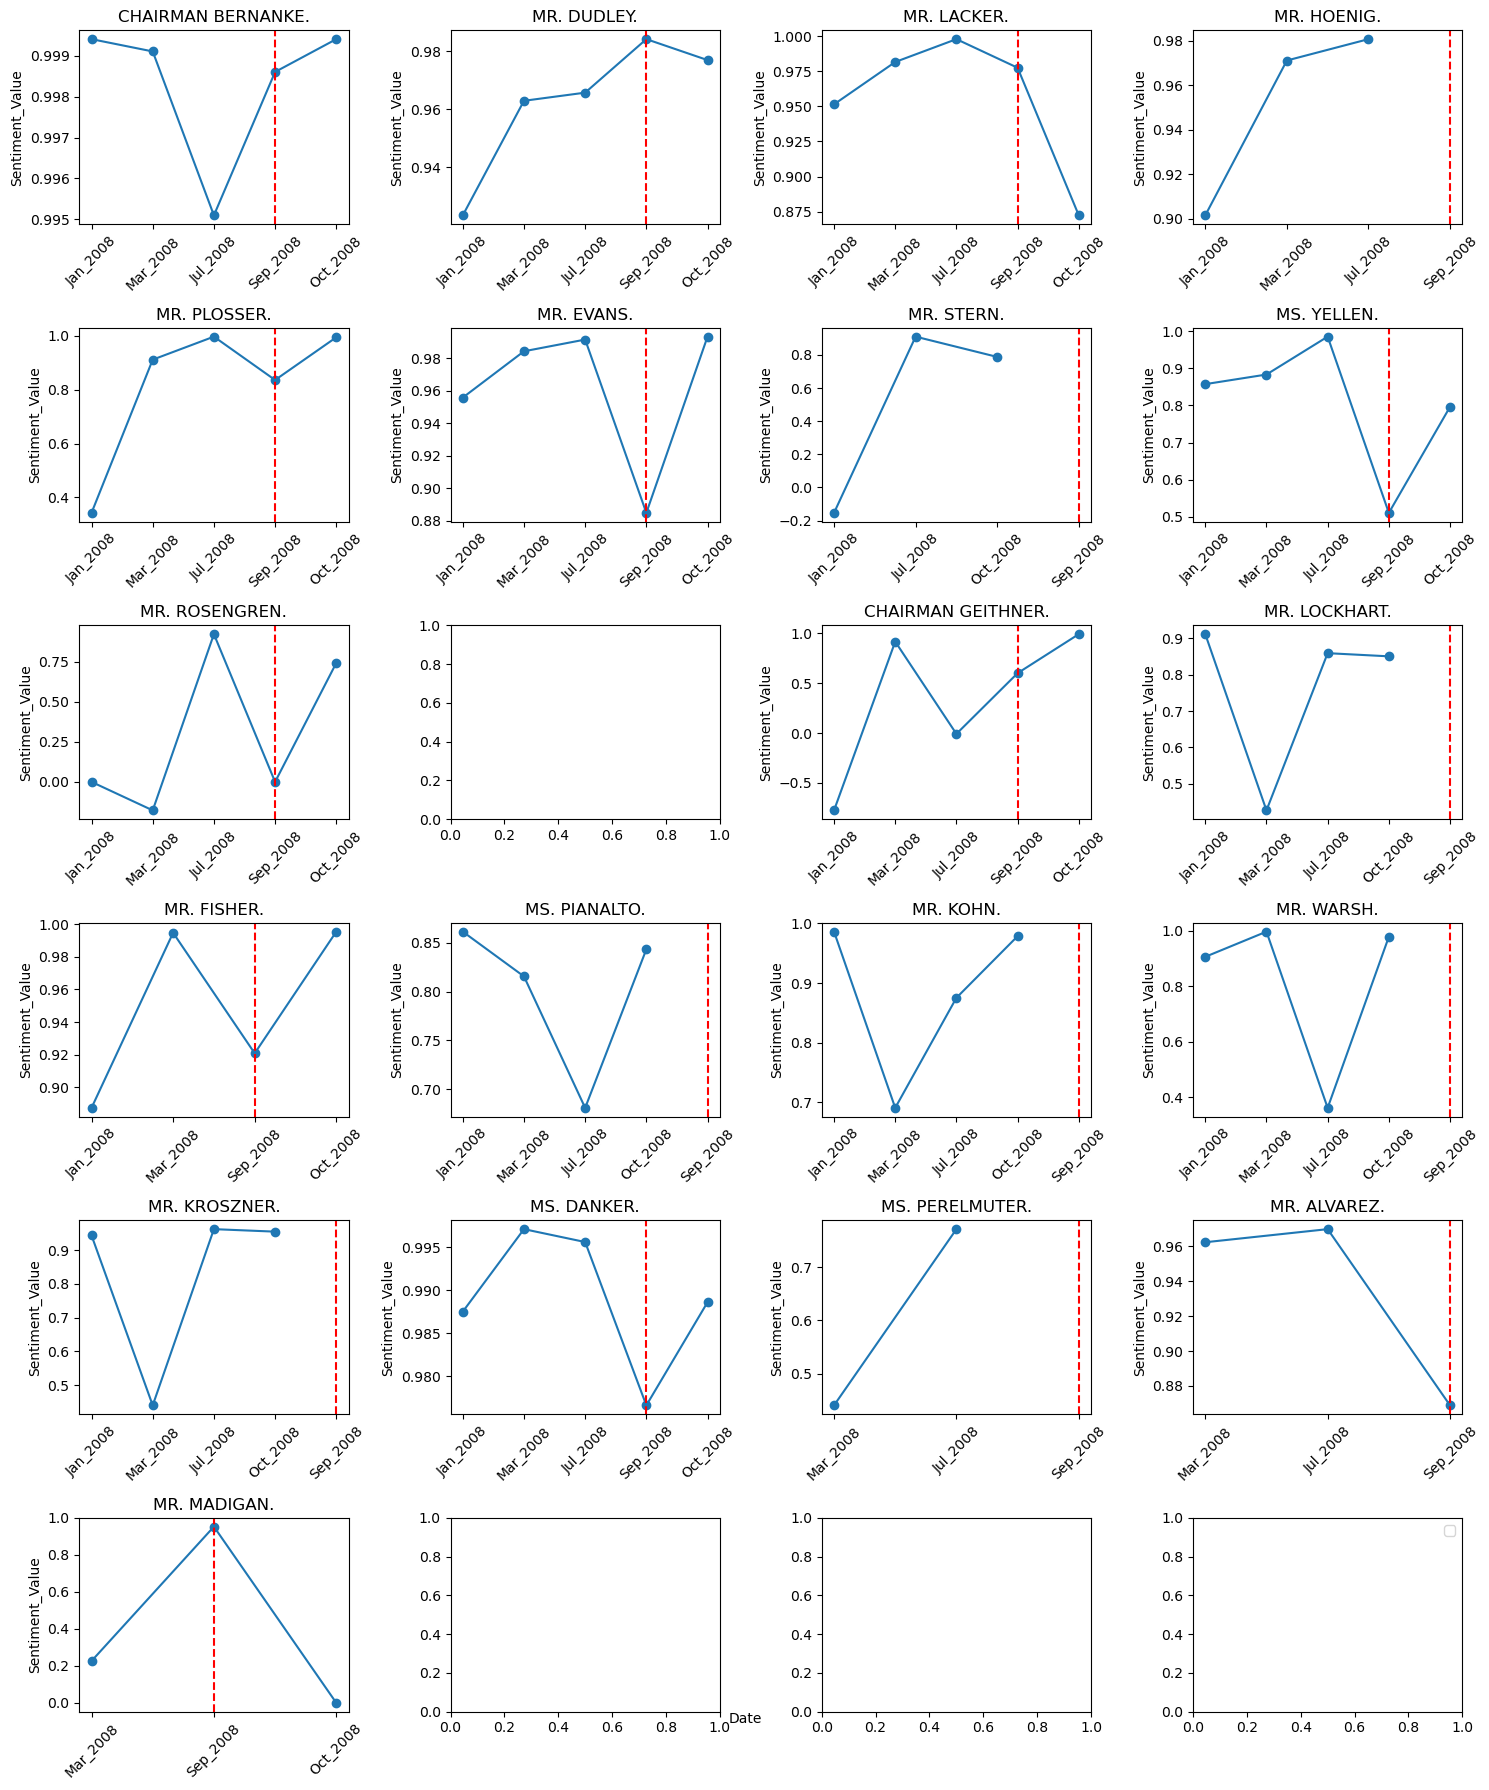

In [538]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming combined_data is your DataFrame containing the data

# Get unique speakers
speakers = combined_data["Speaker"].unique()

# Calculate number of rows and columns for subplot grid
num_rows = 6 
num_cols = 4

# Initialize figure and axis with a smaller figsize
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Loop through speakers
for i, speaker in enumerate(speakers):
    # Calculate row and column index in the subplot grid
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Filter data to keep rows of a speaker
    d = combined_data[combined_data["Speaker"] == speaker] 
    # Filter sentiment compound
    d = d[d['Sentiment'] == 'compound']
    # Get Sentiment_Value and Date
    y = d["Sentiment_Value"]
    x = d['Date']
    
    # Check if there is more than one unique date
    if len(x.unique()) > 1:
        # Plot the data for the current speaker on the corresponding subplot
        axs[row_index, col_index].plot(x, y, marker = 'o', lw=1.5, label=speaker)
        
        # Set subplot title
        axs[row_index, col_index].set_title(speaker)
        # Set subplot ylabel
        axs[row_index, col_index].set_ylabel("Sentiment_Value")
        # Rotate x-axis labels for better readability
        axs[row_index, col_index].tick_params(axis='x', rotation=45)
        
        # Add vertical line for x = Sep_2008
        axs[row_index, col_index].axvline(x='Sep_2008', color='red', linestyle='--')
        
    #else:
        # Hide subplot if there is only one unique date
      #  axs[row_index, col_index].axis('off')
    
# Add legend to the last subplot
axs[-1, -1].legend()

# Set common x-label
fig.text(0.5, 0.04, 'Date', ha='center')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()


**ANS** Most Positive is Chairman Bernanke. Most negative is Vice chairman Geithner. The one who changes the most is Mr. Rosengren. The financial crisis was in September 2008 (according to a google search)

9. Sentiment analysis is not a perfect science, especially when you are using off-the-shelf packages like VADER. Given what you know about the crisis, do you trust Vader's sentiment analysis? WHy or why not?



**Your answer here:** I do not trust vaders analysis because it does not look at the context of the sentence. A "laugh" doesn't always mean good and crying isn't always bad. In isolation, it means different things. 


10. Can you reasonably determine whether a low or negative compound score indicates a negative sentiment from the Fed in 2008? Can you do so with data only from 2008?

Provide a reasonable comparison from 2008 values by comparing it to some other timeframe from the FED confernce call historic database. https://www.federalreserve.gov/monetarypolicy/fomc_historical_year.htm

In [555]:
#Your code here:
import requests
from bs4 import BeautifulSoup

url = "https://www.federalreserve.gov/newsevents/pressreleases/monetary20170201a.htm"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

paragraphs = soup.find_all('p')

statement_2017 = '\n'.join([paragraph.text for paragraph in paragraphs])

index_start = statement_2017.find("Information received since the Federal Open")
index_end = statement_2017.find("Voting for the FOMC monetary policy action were")

#keep only the statement we care
real_statement_2017 = statement_2017[index_start:index_end]


#combined sentiment from the FOMC meetings
combined_text_data = ""
for key, values in dict_urls.items():
    #using our handy dandy function to combine all the statements
    combined_text_data = combined_text_data + text_maker(key + ".pdf")

    
score_2017 = analyzer.polarity_scores(real_statement_2017)
score_2008 = analyzer.polarity_scores(combined_text_data)
print("Sentiment from a meeting in 2017:", score_2017, "\n", "Sentiment from the meetings in 2008:", score_2008)

Sentiment from a meeting in 2017: {'neg': 0.03, 'neu': 0.872, 'pos': 0.098, 'compound': 0.9834} 
 Sentiment from the meetings in 2008: {'neg': 0.058, 'neu': 0.813, 'pos': 0.129, 'compound': 1.0}


**ANS:** There doesn't seem to be a difference in the compound scores between 2008 and 2017. Compound scores are not enough to show negative or positive sentiment and we may need text from other years